# Estimating Airbnb listing prices

<img src = 'https://cdn5.f-cdn.com/contestentries/995221/14777422/58eb66f38d645_thumb900.jpg' width = '600px'>

# Estimating Airbnb listing prices

## The Problem

- Build a model that can predict the listing price for a potential Airbnb listing.

## Hypothesis

- The location and type of rental would dicate price.
- Booking a listing a few nights a month could help supplement living costs.

## Goal

- Have a model that can suggest a listing price based off required criteria.
- Help potential hosts make a decision on weather they would like to open up their home, in return for extra income.
- More Airbnb listings there are more revenue for Airbnb.

## Data

- The dataset contains 31,253 rows with 95 features.
- Many of our feature columns weren't useful, ie photo URLs.
- Need to format our data to be usable in our model, ie price.

In [14]:
la_airbnbs.sample(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
19859,13956153,https://www.airbnb.com/rooms/13956153,20170502172350,2017-05-03,Spacious One Bedroom Pasadena,Clean quite and comfortable room. Located near...,NaN,Clean quite and comfortable room. Located near...,none,NaN,...,9.0,f,NaN,NaN,f,strict,f,f,1,0.51
8459,13681728,https://www.airbnb.com/rooms/13681728,20170502172350,2017-05-03,"Cozy, Zen, Spacious, Upgraded Vintage Style","My place is walking distance to Fairfax Ave, T...",Apartment is very large. Lots of natural light...,"My place is walking distance to Fairfax Ave, T...",none,"If you are in need of some exercise, you are a...",...,10.0,f,NaN,"City of Los Angeles, CA",f,strict,f,f,1,0.23
14264,16673011,https://www.airbnb.com/rooms/16673011,20170502172350,2017-05-03,Enchanting Escape Los Feliz 2Bdrm--Scenice Views,"Minutes to Hollywood, enjoy a quiet neighborho...",Close to the action of Hollywood but without t...,"Minutes to Hollywood, enjoy a quiet neighborho...",none,The duplex is a few blocks away from the trend...,...,9.0,f,NaN,"City of Los Angeles, CA",t,strict,f,f,10,2.26
19888,12177881,https://www.airbnb.com/rooms/12177881,20170502172350,2017-05-03,Little House in Pasadena,Inquire about promotion we are running from Ap...,"Clean, safe and simple living. Great location ...",Inquire about promotion we are running from Ap...,none,It has easy access to everything in Pasadena -...,...,10.0,f,NaN,NaN,f,moderate,f,f,2,0.67
30316,16976030,https://www.airbnb.com/rooms/16976030,20170502172350,2017-05-02,"Studio w/ Downtown view, parking, patio, sunlit",• 5 Minute walk to the heart of Downtown! • On...,NaN,• 5 Minute walk to the heart of Downtown! • On...,none,NaN,...,10.0,f,NaN,"City of Los Angeles, CA",f,strict,f,f,10,6.21


In [8]:
fix_la_airbnbs = pd.read_csv('../data/la_airbnb_fixed.csv', low_memory = False)

(31253, 95)

## Approach

- Find the best group of features to help predict our model.
    - Clean data to be usable.
    - Drop outling data points.
    - Remove empty listings.
    - Create dummy variables.
    - Feature engineering.

- Try different model types with those set of features.
    - Linear Regression    
    - Random Forest Regressor
    - Decision Tree Regressor

### Scatter plot of all listing prices based off number of beds

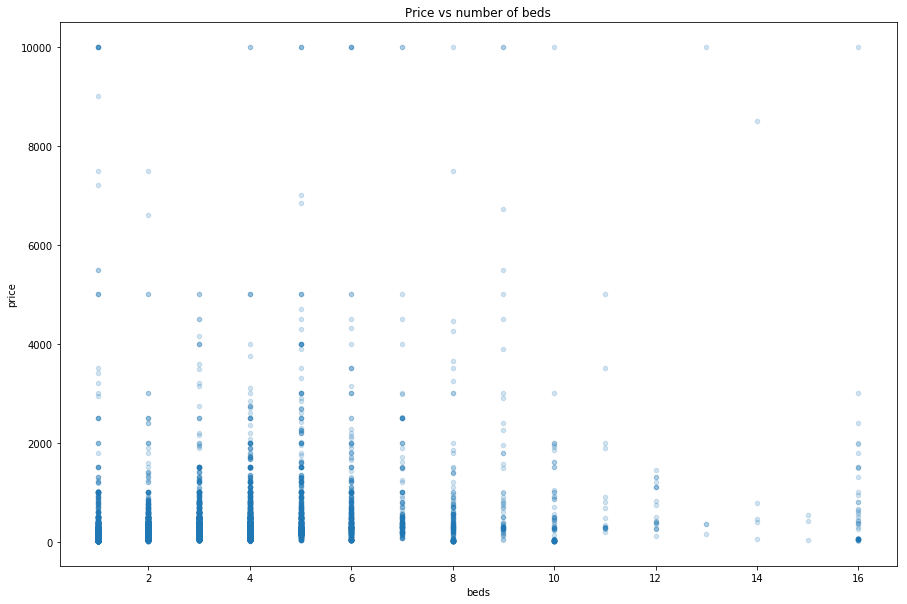

In [79]:
ax = cleaned_la_airbnbs.plot(kind = 'scatter', x = 'beds', y = 'price', alpha = .2, figsize = (15, 10))
ax.set_title('Price vs number of beds');

### Scatter plot of prices with general outliers removed
- Problem is we cut off all listings above a certain price.  Not necessarily accurate.

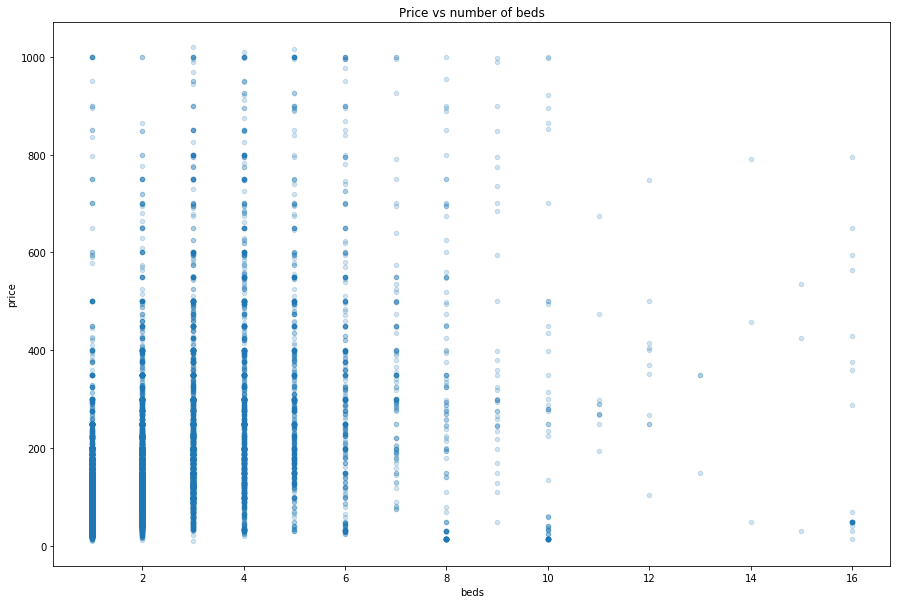

In [82]:
ax = drop_rating_no_outliers_la_airbnb.plot(kind = 'scatter', x = 'beds', y = 'price', alpha = .2, figsize = (15, 10))
ax.set_title('Price vs number of beds');

### Scatter plot of prices with individual outliers removed

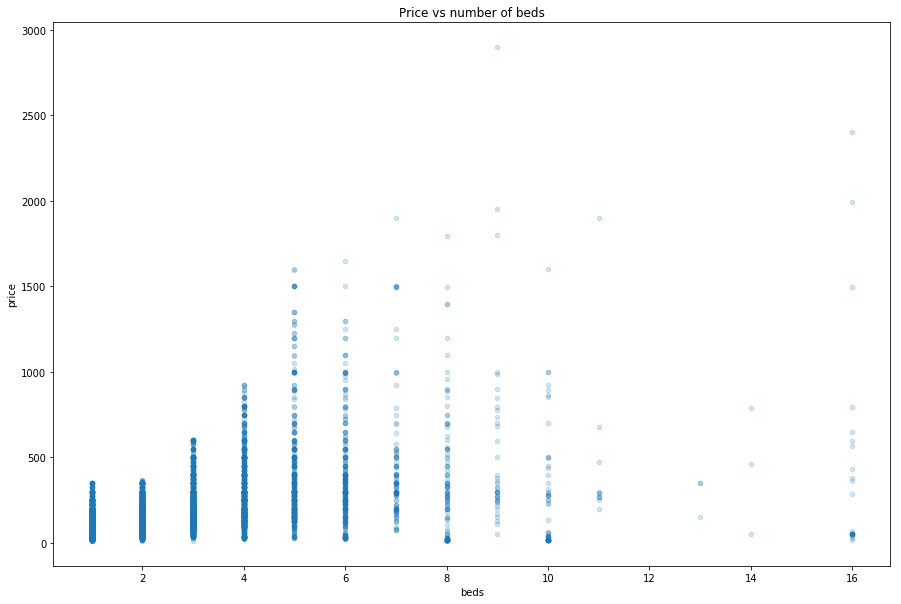

In [81]:
ax = drop_rating_ind_outliers_la_airbnb.plot(kind = 'scatter', x = 'beds', y = 'price', alpha = .2, figsize = (15, 10))
ax.set_title('Price vs number of beds');

## Results

### Root Mean Squared Error

In [109]:
print(f'Initial build with basic features RMSE: {round(clean_rmse, 2)}')
print(f'No outliers build with basic features RMSE: {round(no_outliers_rmse, 2)}')
print(f'Dropped empty listings, no outliers and basic features RMSE: {round(drop_rate_outliers_rmse, 2)}')
print(f'Dropped individual outliers and empty listings with basic features RMSE: {round(drop_rate_ind_outliers_rmse, 2)}')
print(f'Dropped individual outliers and empty listings with added dummies RMSE: {round(dummies_drop_ind_outlier_rmse, 2)}')
print(f'Dropped individual outliers and empty listings with added dummy variables and feature engineering RMSE: {round(feature_dummies_drop_ind_outliers_rmse, 2)}')

Initial build with basic features RMSE: 426.04
No outliers build with basic features RMSE: 102.14
Dropped empty listings, no outliers and basic features RMSE: 93.22
Dropped individual outliers and empty listings with basic features RMSE: 89.74
Dropped individual outliers and empty listings with added dummies RMSE: 82.81
Dropped individual outliers and empty listings with added dummy variables and feature engineering RMSE: 2.4


### Model Accuracy

Linear Regression train score 65.01%
Linear Regression test score 65.32%
Random Forest Regression train score 93.0%
Random Forest Regression test score 72.2%
Decision Forest Regression train score 85.01%
Decision Forest Regression test score 73.74%


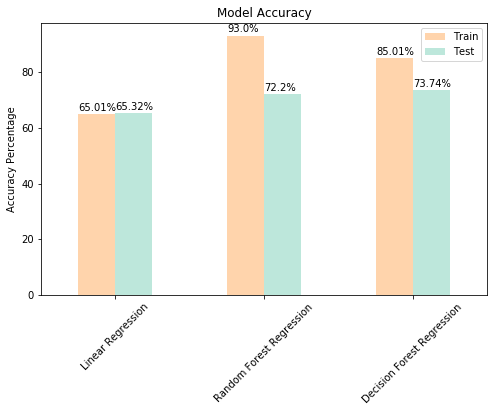

In [170]:
print(f'Linear Regression train score {round((linreg_train_score * 100), 2)}%')
print(f'Linear Regression test score {round((linreg_test_score * 100), 2)}%')
print(f'Random Forest Regression train score {round((rfr_train_score * 100), 2)}%')
print(f'Random Forest Regression test score {round((rfr_test_score * 100), 2)}%')
print(f'Decision Forest Regression train score {round((rfreg_train_score * 100), 2)}%')
print(f'Decision Forest Regression test score {round((rfreg_test_score * 100), 2)}%')
ax = scores_df.plot(kind = 'bar', rot = 45, colormap = 'icefire_r', figsize = (8, 5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)) + '%', (p.get_x() * 1.001, p.get_height() * 1.015))
ax.set_ylabel('Accuracy Percentage')
ax.set_title('Model Accuracy');

## Findings

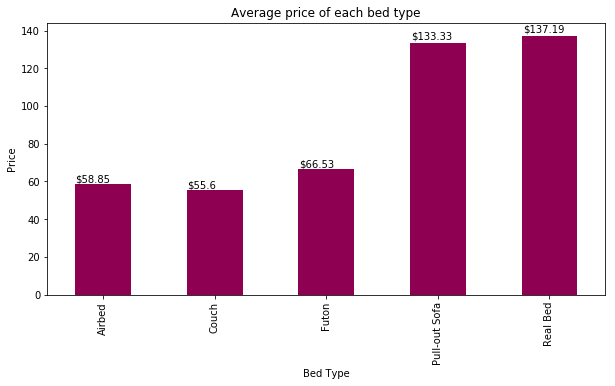

In [103]:
# Plot the average price of bed types.
ax = drop_rating_ind_outliers_la_airbnb.loc[:, ['price', 'bed_type']].groupby('bed_type').mean().plot(kind = 'bar',
                                                                                                      colormap = 'PiYG', figsize = (10, 5), legend = False)
for p in ax.patches:
    ax.annotate('$' + str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.015))
    ax.set_xlabel('Bed Type')
    ax.set_ylabel('Price')
    ax.set_title('Average price of each bed type')

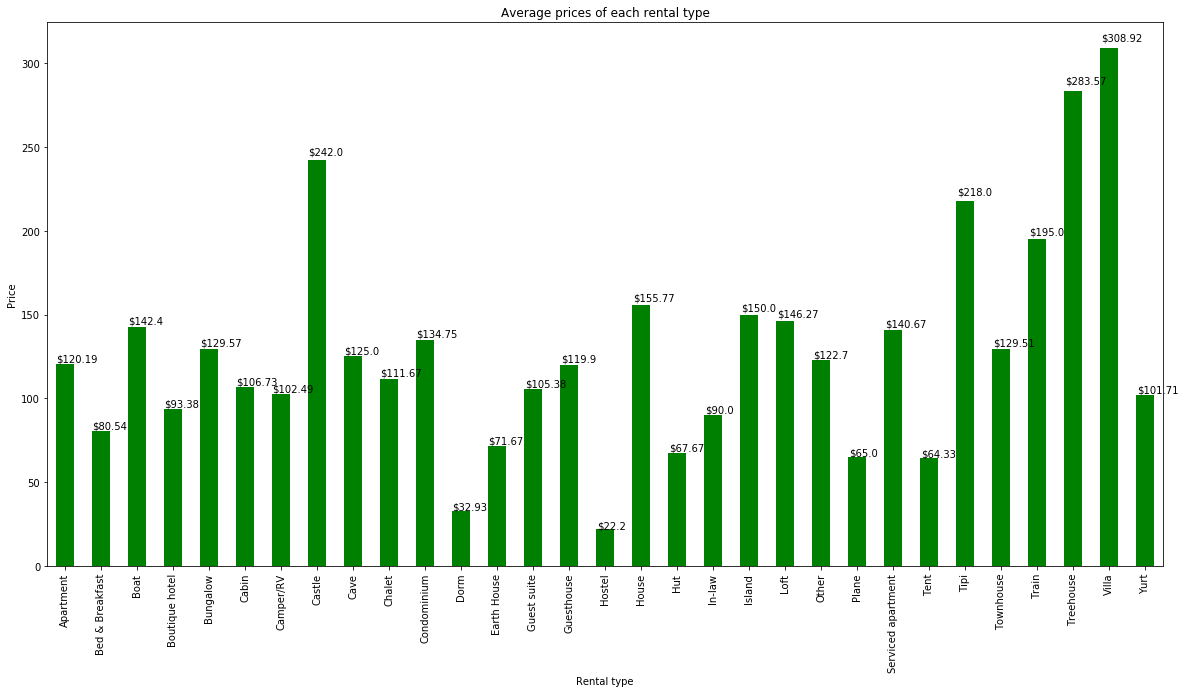

In [106]:
# Plot average price of each type of rental listings.
ax = drop_rating_ind_outliers_la_airbnb.loc[:, ['price', 'property_type']].groupby('property_type').mean().plot(kind = 'bar',
                                                                                                                color = 'g', figsize = (20, 10), legend = False)
for p in ax.patches:
    ax.annotate('$' + str(round(p.get_height(), 2)), (p.get_x() * 1.001, p.get_height() * 1.015))
    ax.set_xlabel('Rental type')
    ax.set_ylabel('Price')
    ax.set_title('Average prices of each rental type')

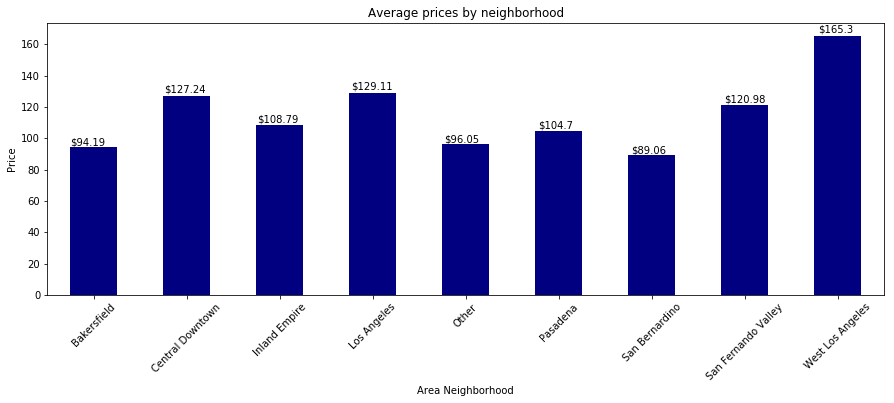

In [105]:
# Plot of average price based on Neighborhood area.
ax = drop_rating_ind_outliers_la_airbnb.loc[:, ['price', 'zip_area']].groupby('zip_area').mean().plot(kind = 'bar',
                                                                                                      colormap = 'jet', figsize = (15, 5), legend = False, rot = 45)
for p in ax.patches:
    ax.annotate('$' + str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.015))
    ax.set_xlabel('Area Neighborhood')
    ax.set_ylabel('Price')
    ax.set_title('Average prices by neighborhood')

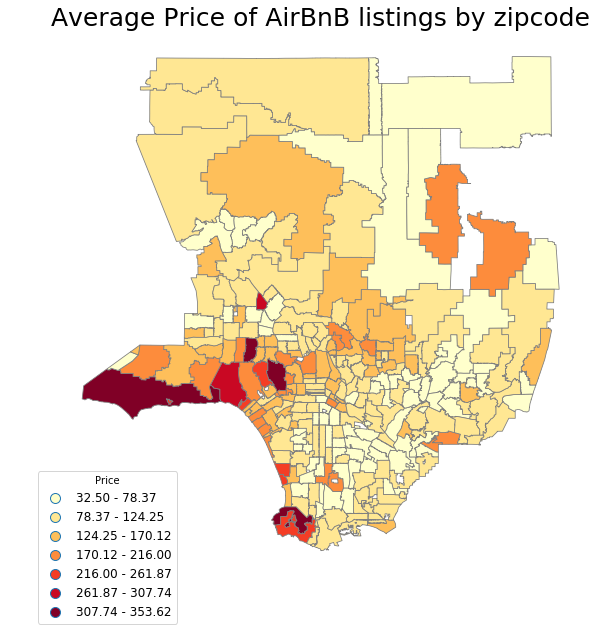

In [211]:
target_col = 'price'
vmin, vmax  = 0, 400
fig, ax = plt.subplots(1, figsize = (10, 10))

test.plot(column=target_col, cmap='YlOrRd',
          linewidth=0.8,
          edgecolor='0.5',
          ax = ax,
          scheme = 'equal_interval',
          k = 7,
          legend = True, 
          legend_kwds={'loc': 'lower left', 'title': 'Price', 'fancybox' : True, 'fontsize': 12, 'bbox_to_anchor': (-.05, -.1)})
ax.axis('off')
ax.set_aspect(1)
ax.set_title('Average Price of AirBnB listings by zipcode', fontdict={'fontsize': '25', 'fontweight' : '3'});

## Next Steps

- Gather more listings.
- Is there a way to keep outliers, or a different way to handle them.
- How often listings get booked?
- Time when listings get booked more often.
    - Price surge during this period.
- Would this model work in other major cities.